# **PROBLEM STATEMENT**

Analyze how different lifestyle factors (sleep, exercise, social media use, and study habits) influence students’ academic performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()

Saving students_lifestyle_5000.csv to students_lifestyle_5000.csv


# **Visualization before cleaning**

In [3]:
df = pd.read_csv("students_lifestyle_5000.csv")
df.head()

,Student_ID,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,S02765,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,S04768,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,S03815,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3
3,S03500,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,S04622,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Study_Hours_Per_Day      4708 non-null   float64
 4   Sleep_Hours              4664 non-null   float64
 5   Physical_Activity_Hours  4712 non-null   float64
 6   Screen_Time_Hours        5000 non-null   float64
 7   Social_Activity_Score    4701 non-null   float64
 8   Stress_Level             4714 non-null   object 
 9   Academic_Score           5000 non-null   float64
 10  Mental_Wellbeing_Score   5000 non-null   float64
 11  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
# a detailed description of numeric concepts
desc = df[['Study_Hours_Per_Day', 'Sleep_Hours', 'Screen_Time_Hours', 'Social_Activity_Score', 'Mental_Wellbeing_Score',
           'Physical_Activity_Hours', 'Academic_Score']].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
print(desc)


        Study_Hours_Per_Day  Sleep_Hours  Screen_Time_Hours  \
mean               3.128619     7.016627           4.099088   
median             2.980000     6.980000           4.060000   
std                2.447051     1.584124           2.225928   
var                5.988057     2.509448           4.954754   
skew               2.938390     1.520415           0.858872   
kurt              21.101850    15.739354           3.640808   

        Social_Activity_Score  Mental_Wellbeing_Score  \
mean                 6.031568               42.976740   
median               6.000000               42.800000   
std                  1.950323                9.746892   
var                  3.803761               95.001909   
skew                -0.103826                0.072116   
kurt                -0.406770                0.414295   

        Physical_Activity_Hours  Academic_Score  
mean                   1.024465       71.697000  
median                 0.880000       71.600000  
std     

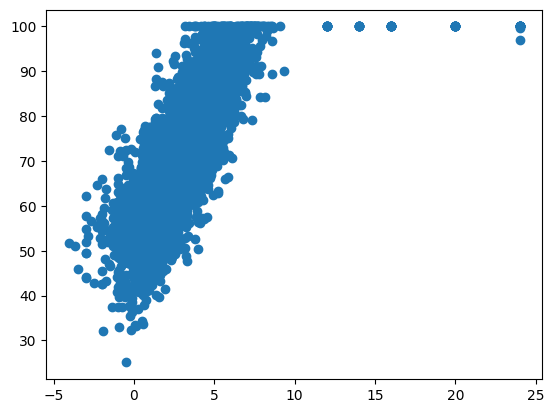

In [ ]:
plt.scatter(df['Study_Hours_Per_Day'], df['Academic_Score'])

<Axes: xlabel='Gender', ylabel='count'>

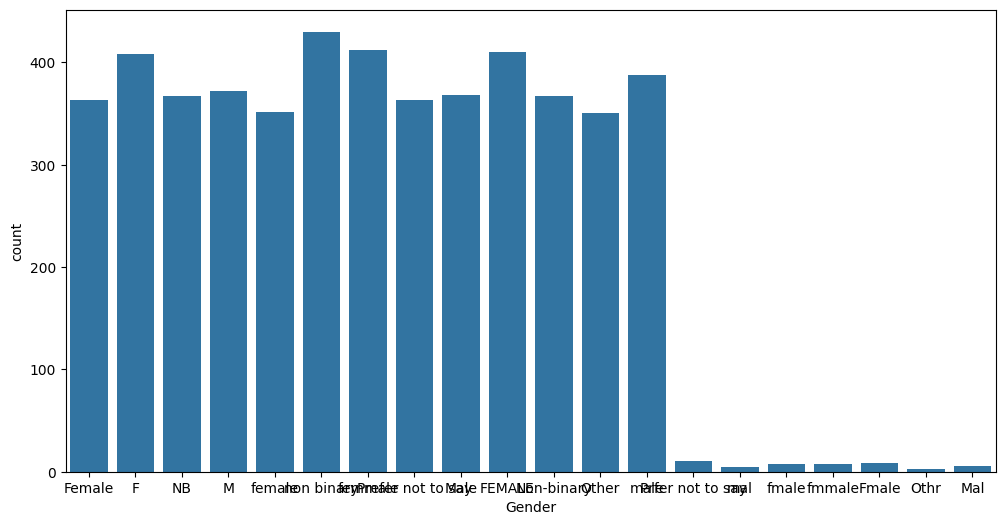

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)

In [ ]:
df["Gender"].unique()

array(['Female', 'F', 'NB', 'M', 'female', 'non binary', 'femmale',
       'Prefer not to say', 'Male', 'FEMALE', 'Non-binary', 'Other',
       'male', 'Prfer not to say', 'mal', 'fmale', 'fmmale', 'Fmale',
       'Othr', 'Mal'], dtype=object)

<Axes: xlabel='Stress_Level', ylabel='count'>

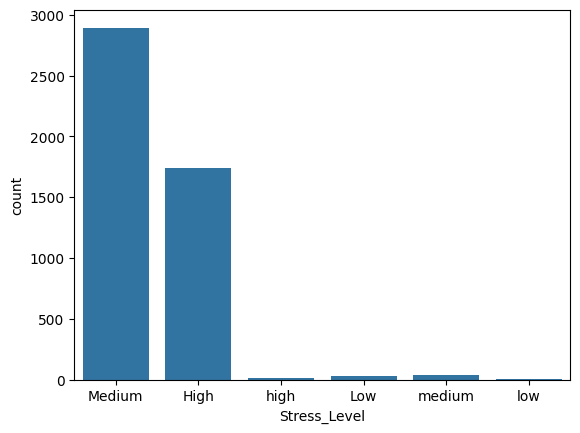

In [ ]:
sns.countplot(x='Stress_Level', data=df)

<Axes: xlabel='Study_Hours_Per_Day', ylabel='Count'>

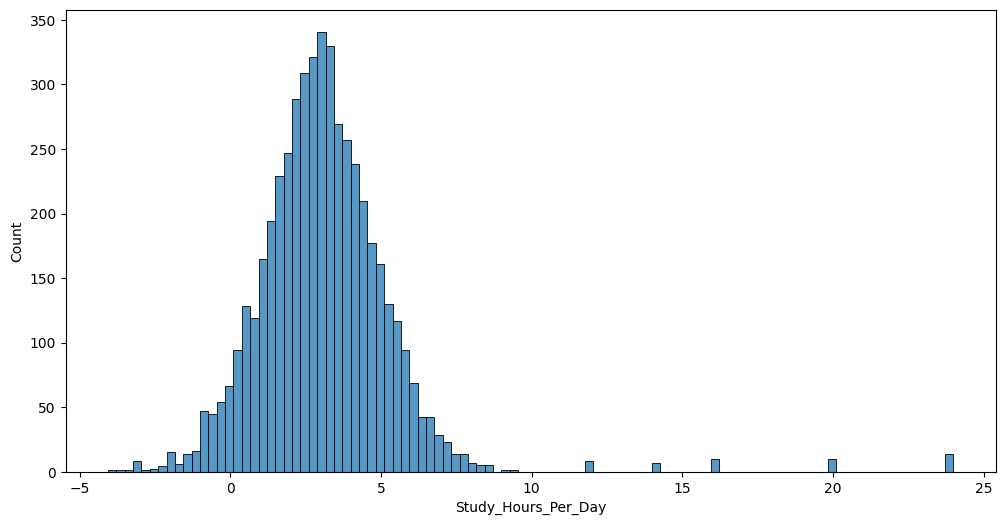

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Study_Hours_Per_Day', data=df)

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

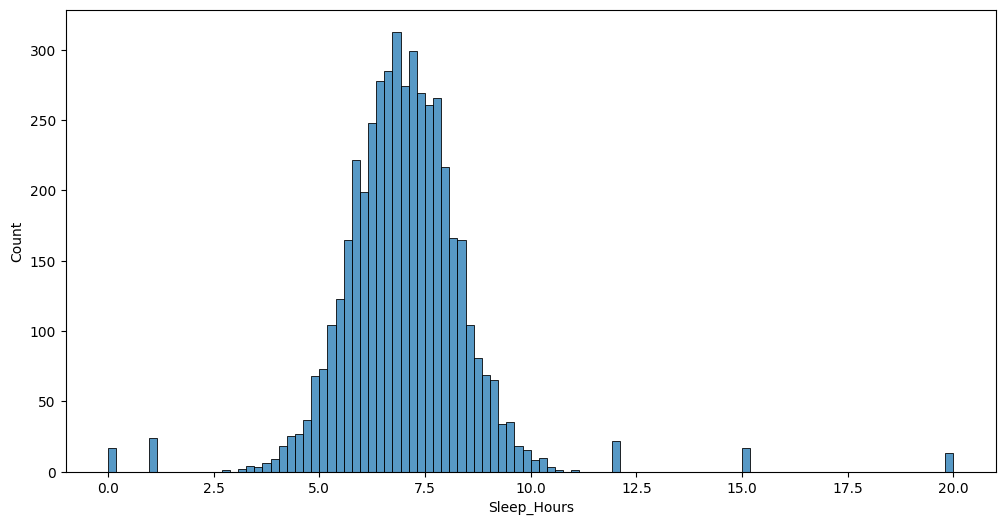

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Sleep_Hours', data=df)

<Axes: xlabel='Physical_Activity_Hours', ylabel='Count'>

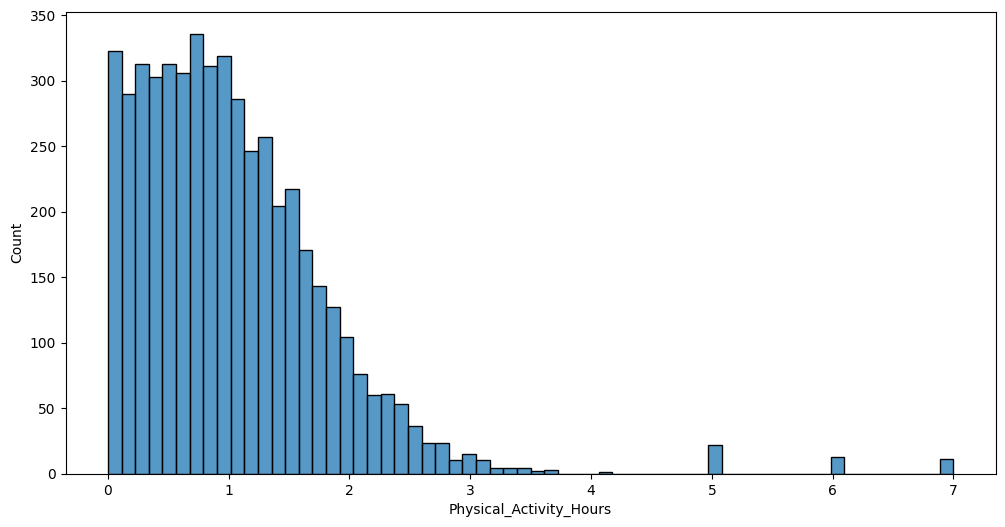

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Physical_Activity_Hours', data=df)

In [ ]:
df["Physical_Activity_Hours"].describe()

,Physical_Activity_Hours
count,5000.000000
mean,1.034208
std,0.813106
min,0.000000
25%,0.460000
50%,0.910000
75%,1.430000
max,7.000000


<Axes: xlabel='Social_Activity_Score', ylabel='Count'>

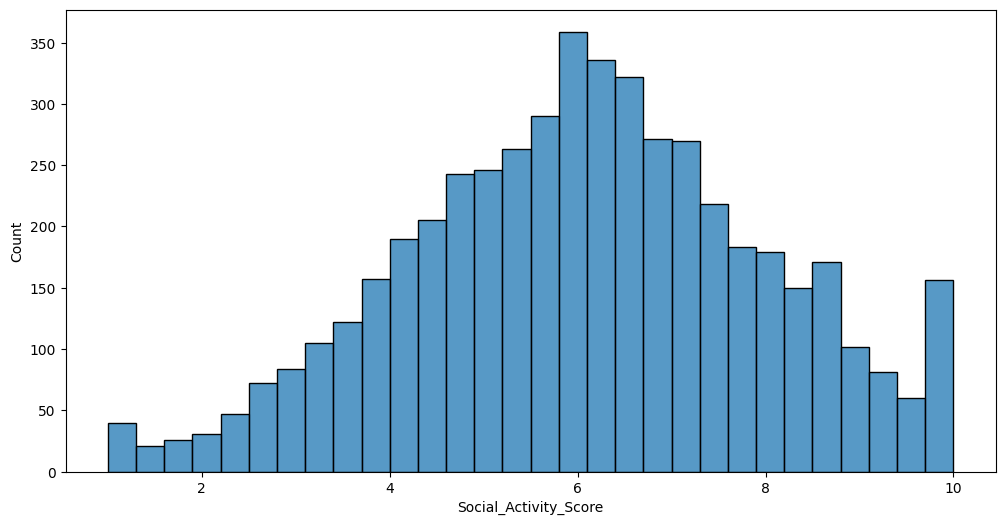

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Social_Activity_Score', data=df)

In [ ]:
df['Social_Activity_Score'].describe()

,Social_Activity_Score
count,5000.000000
mean,6.031460
std,1.903475
min,1.000000
25%,4.700000
50%,6.070000
75%,7.300000
max,10.000000


<Axes: xlabel='Mental_Wellbeing_Score', ylabel='Count'>

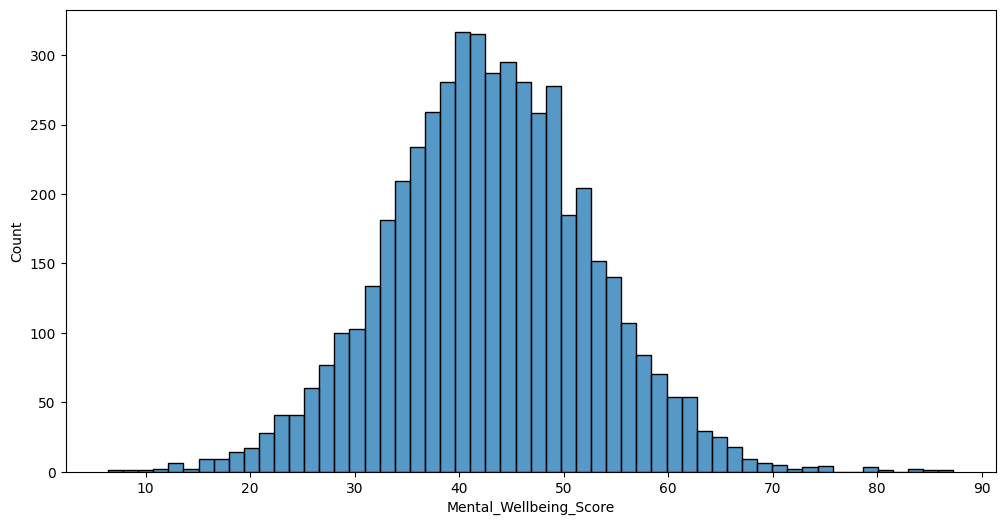

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Mental_Wellbeing_Score', data=df)

In [ ]:
df['Mental_Wellbeing_Score'].describe()

,Mental_Wellbeing_Score
count,5000.000000
mean,42.976740
std,9.746892
min,6.400000
25%,36.700000
50%,42.800000
75%,49.200000
max,87.300000


<Axes: xlabel='Attendance_Rate', ylabel='Count'>

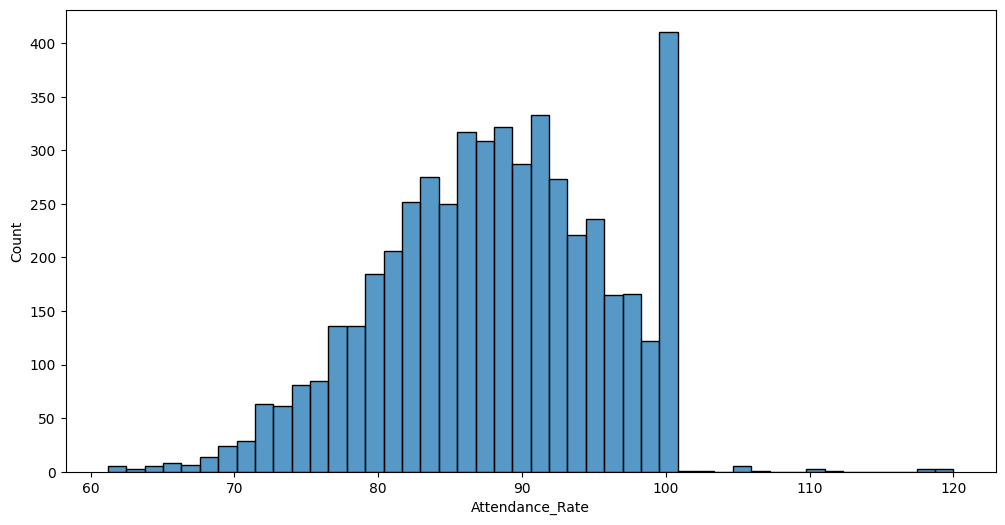

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Attendance_Rate', data=df)

In [ ]:
df['Attendance_Rate'].describe()

,Attendance_Rate
count,5000.000000
mean,87.950340
std,7.729093
min,61.200000
25%,82.700000
50%,88.300000
75%,93.700000
max,120.000000


<Axes: xlabel='Screen_Time_Hours', ylabel='Count'>

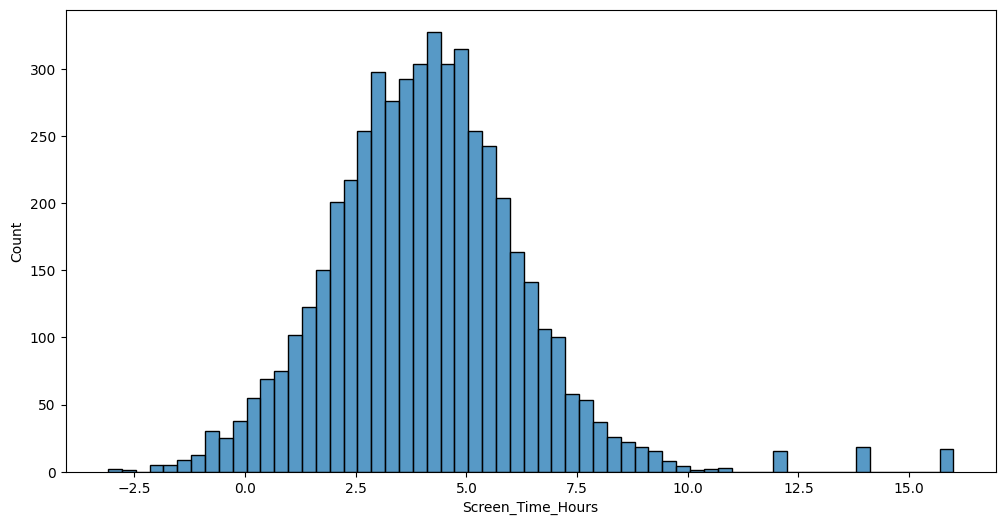

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Screen_Time_Hours', data=df)

In [ ]:
df['Screen_Time_Hours'].describe()

,Screen_Time_Hours
count,5000.000000
mean,4.099088
std,2.225928
min,-3.100000
25%,2.680000
50%,4.060000
75%,5.360000
max,16.000000


In [ ]:
df.head()

,Student_ID,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,S02765,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,S04768,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,S03815,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3
3,S03500,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,S04622,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


In [4]:
df.drop(columns=['Student_ID'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      4708 non-null   float64
 3   Sleep_Hours              4664 non-null   float64
 4   Physical_Activity_Hours  4712 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    4701 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


Text(0.5, 1.0, 'Missing Values Heatmap')

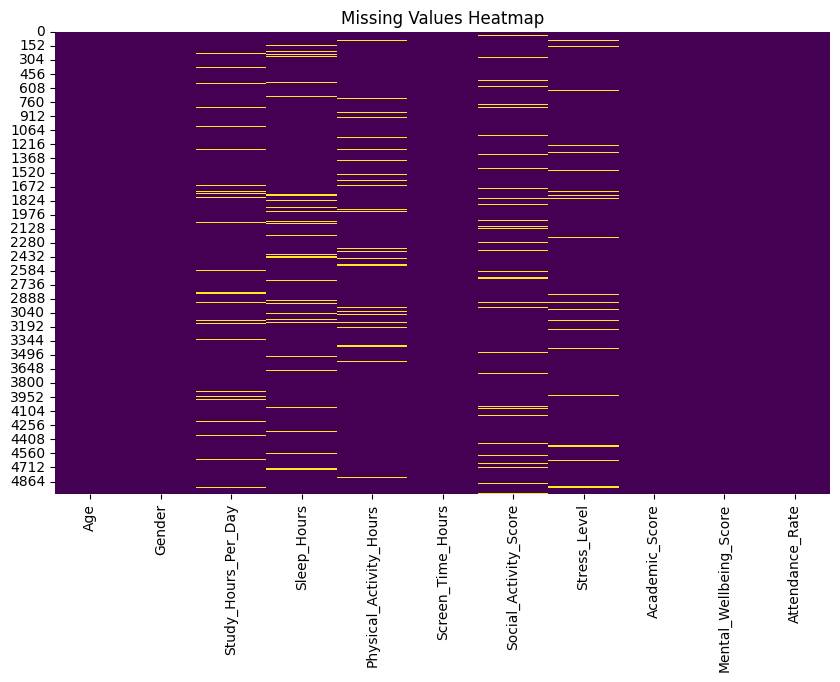

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

# **Findings**

1. columns like Study_Hours_Per_Day,	Sleep_Hours,	Physical_Activity_Hours,	and	Social_Activity_Score have many missing values.
2. Study_Hours_Per_Day,	Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Attendance_Rate and metnal_wellbeing_score columns have outliers that needed to remove.
3. dataset has 9 numerical columns and only two categorical columns.
4. categorical like gender and stress level have same categories with diferent name.


In [ ]:
df.describe(include='all')

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
count,5000.000000,5000,4708.000000,4664.000000,4712.000000,5000.000000,4701.000000,4714,5000.000000,5000.000000,5000.000000
unique,NaN,20,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
top,NaN,non binary,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,NaN
freq,NaN,430,NaN,NaN,NaN,NaN,NaN,2894,NaN,NaN,NaN
mean,22.149600,NaN,3.128619,7.016627,1.024465,4.099088,6.031568,NaN,71.697000,42.976740,87.950340
std,4.015725,NaN,2.447051,1.584124,0.829936,2.225928,1.950323,NaN,13.303745,9.746892,7.729093
min,16.000000,NaN,-4.060000,0.000000,0.000000,-3.100000,1.000000,NaN,25.100000,6.400000,61.200000
25%,19.000000,NaN,1.770000,6.180000,0.440000,2.680000,4.700000,NaN,62.275000,36.700000,82.700000
50%,22.000000,NaN,2.980000,6.980000,0.880000,4.060000,6.000000,NaN,71.600000,42.800000,88.300000
75%,25.000000,NaN,4.260000,7.790000,1.430000,5.360000,7.400000,NaN,80.600000,49.200000,93.700000


# **Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      4708 non-null   float64
 3   Sleep_Hours              4664 non-null   float64
 4   Physical_Activity_Hours  4712 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    4701 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


# **Handle missing value**



In [7]:
missing_percentage = (df["Study_Hours_Per_Day"].isnull().sum() / len(df["Study_Hours_Per_Day"])) * 100

# Print results
print("Percentage of missing values in each column:\n")
print(missing_percentage)

Percentage of missing values in each column:

5.84


the numerical columns like 'Study_Hours_Per_Day' has almost 5% missing values and it is MAR(missing at random)

In [8]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

df['Stress_Level_encoded'] = df['Stress_Level'].astype('category').cat.codes
features = ['Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours',
            'Stress_Level_encoded', 'Academic_Score']

# Convert categorical 'Stress_Level' to numeric if needed


# Create a copy to avoid modifying the original
data_for_imputation = df[features].copy()

# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform only the selected columns
imputed_data = imputer.fit_transform(data_for_imputation)

# Replace the original column with the imputed values for Study_Hours_Per_Day
df['Study_Hours_Per_Day_After'] = imputed_data[:, 0]

print("Missing values in 'Study_Hours_Per_Day_After' after imputation:", df['Study_Hours_Per_Day_After'].isnull().sum())


Missing values in 'Study_Hours_Per_Day_After' after imputation: 0


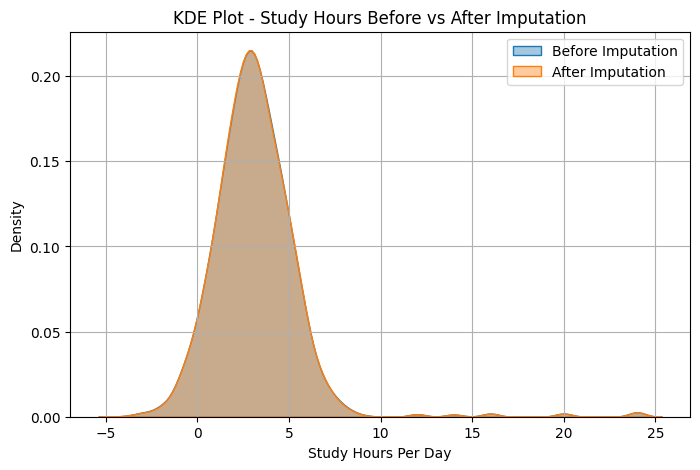

In [9]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Study_Hours_Per_Day'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Study_Hours_Per_Day_After'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Study Hours Before vs After Imputation')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df["Study_Hours_Per_Day"]=df["Study_Hours_Per_Day_After"]
df.drop(columns=['Study_Hours_Per_Day_After'], inplace=True)
df.head()

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_encoded
0,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2,2
1,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8,2
2,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3,-1
3,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7,2
4,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6,2


In [11]:
missing_percentage = (df["Sleep_Hours"].isnull().sum() / len(df["Sleep_Hours"])) * 100

# Print results
print("Percentage of missing values in each column:\n")
print(missing_percentage)

Percentage of missing values in each column:

6.72


In [12]:

features = ['Sleep_Hours', 'Study_Hours_Per_Day', 'Physical_Activity_Hours',
            'Stress_Level_encoded', 'Academic_Score']


# Create a copy to avoid modifying the original
data_for_imputation = df[features].copy()

# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform only the selected columns
imputed_data = imputer.fit_transform(data_for_imputation)

# Replace the original column with the imputed values for Study_Hours_Per_Day
df['Sleep_Hours_After'] = imputed_data[:, 0]

print("Missing values in 'Sleep_Hours_After' after imputation:", df['Sleep_Hours_After'].isnull().sum())


Missing values in 'Sleep_Hours_After' after imputation: 0


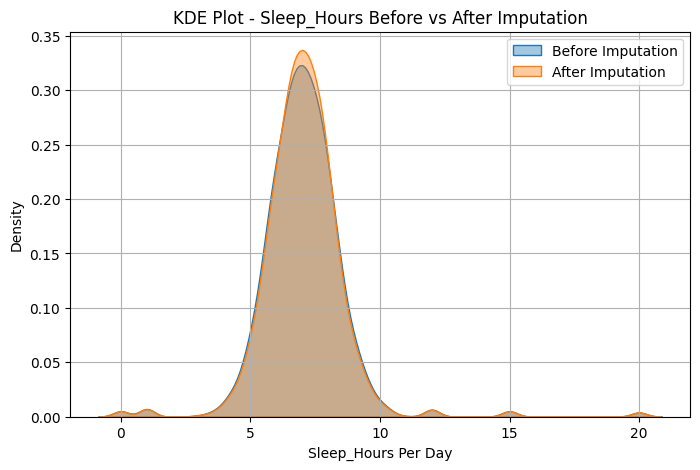

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Sleep_Hours'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Sleep_Hours_After'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Sleep_Hours Before vs After Imputation')
plt.xlabel('Sleep_Hours Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

0


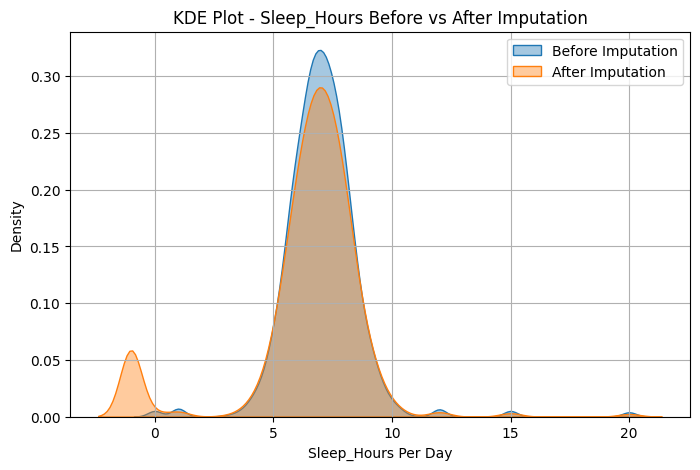

In [14]:
df['Sleep_Hours_Arbitrary'] = df['Sleep_Hours'].fillna(-1)

# Check results
print(df['Sleep_Hours_Arbitrary'].isnull().sum())

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Sleep_Hours'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Sleep_Hours_Arbitrary'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Sleep_Hours Before vs After Imputation')
plt.xlabel('Sleep_Hours Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df['Sleep_Hours']=df['Sleep_Hours_After']
df.drop(columns=['Sleep_Hours_After','Sleep_Hours_Arbitrary'], inplace=True)
df.head()

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_encoded
0,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2,2
1,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8,2
2,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3,-1
3,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7,2
4,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6,2


In [16]:
missing_percentage = (df["Physical_Activity_Hours"].isnull().sum() / len(df["Physical_Activity_Hours"])) * 100

# Print results
print("Percentage of missing values in each column:\n")
print(missing_percentage)

Percentage of missing values in each column:

5.76


In [17]:
from sklearn.impute import KNNImputer

# Select related features for imputation
features = ['Physical_Activity_Hours', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Screen_Time_Hours']

# Create a copy for imputation
data_for_imputation = df[features].copy()

# Initialize KNN Imputer (k=5 is common)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform
imputed_data = imputer.fit_transform(data_for_imputation)

# Replace column in df
df['Physical_Activity_Hours_After'] = imputed_data[:, 0]

print("Missing values after imputation:", df['Physical_Activity_Hours_After'].isnull().sum())


Missing values after imputation: 0


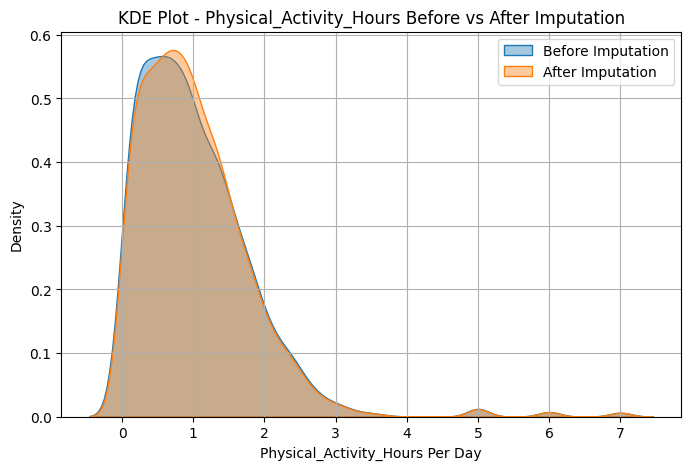

In [18]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Physical_Activity_Hours'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Physical_Activity_Hours_After'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Physical_Activity_Hours Before vs After Imputation')
plt.xlabel('Physical_Activity_Hours Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
df['Physical_Activity_Hours']=df['Physical_Activity_Hours_After']
df.drop(columns=['Physical_Activity_Hours_After'], inplace=True)
df.head()

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_encoded
0,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2,2
1,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8,2
2,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3,-1
3,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7,2
4,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6,2


In [20]:
missing_percentage = (df["Social_Activity_Score"].isnull().sum() / len(df["Social_Activity_Score"])) * 100

# Print results
print("Percentage of missing values in each column:\n")
print(missing_percentage)

Percentage of missing values in each column:

5.9799999999999995


Missing Social Activity Scores after imputation: 0


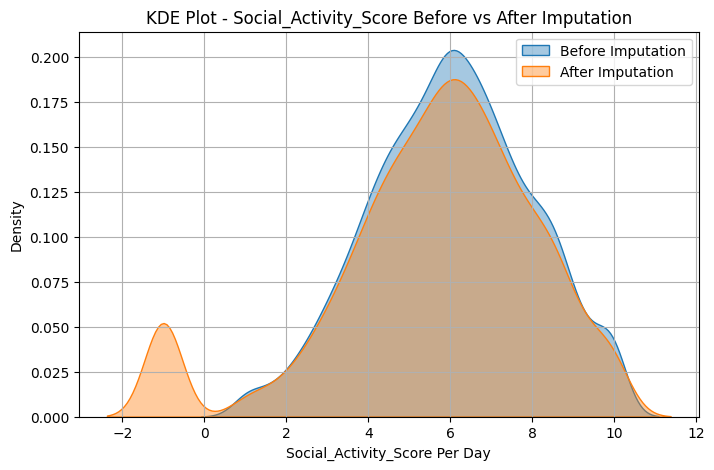

In [21]:
df['Social_Activity_Score_Arbitrary'] = df['Social_Activity_Score'].fillna(-1)

# Check results
print("Missing Social Activity Scores after imputation:",
      df['Social_Activity_Score_Arbitrary'].isnull().sum())
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_Arbitrary'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Imputation')
plt.xlabel('Social_Activity_Score Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5000 non-null   int64  
 1   Gender                           5000 non-null   object 
 2   Study_Hours_Per_Day              5000 non-null   float64
 3   Sleep_Hours                      5000 non-null   float64
 4   Physical_Activity_Hours          5000 non-null   float64
 5   Screen_Time_Hours                5000 non-null   float64
 6   Social_Activity_Score            4701 non-null   float64
 7   Stress_Level                     4714 non-null   object 
 8   Academic_Score                   5000 non-null   float64
 9   Mental_Wellbeing_Score           5000 non-null   float64
 10  Attendance_Rate                  5000 non-null   float64
 11  Stress_Level_encoded             5000 non-null   int8   
 12  Social_Activity_Scor

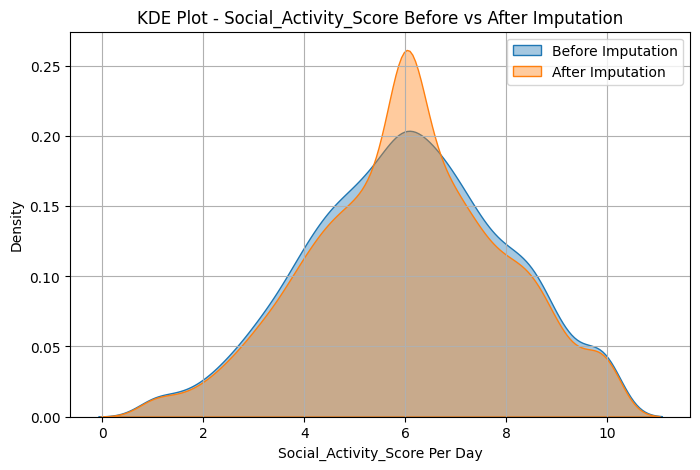

In [22]:

imputer = KNNImputer(n_neighbors=5)
cols = ['Social_Activity_Score']
df['Social_Activity_Score_KNN'] = imputer.fit_transform(df[cols])
df.info()

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_KNN'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Imputation')
plt.xlabel('Social_Activity_Score Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

1% quantile (used for imputation): 1.4
Missing values after imputation: 0


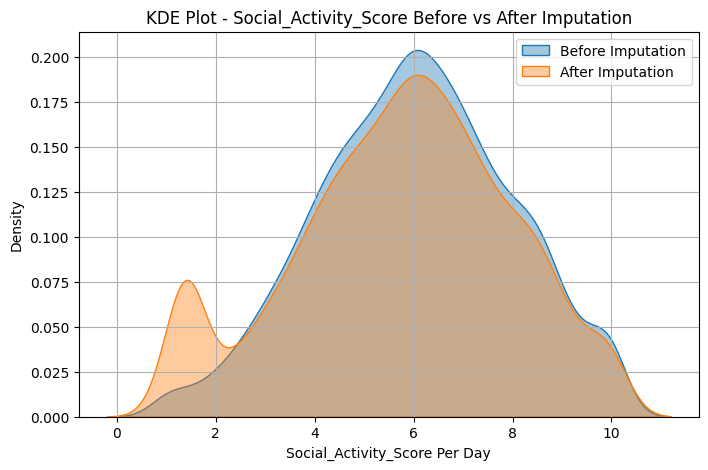

In [23]:
low_end = df['Social_Activity_Score'].quantile(0.01)

# 3. Replace missing values with this low-end value
df['Social_Activity_Score_EndDist'] = df['Social_Activity_Score'].fillna(low_end)

# 4. Check results
print("1% quantile (used for imputation):", low_end)
print("Missing values after imputation:", df['Social_Activity_Score_EndDist'].isnull().sum())

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_EndDist'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Imputation')
plt.xlabel('Social_Activity_Score Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

1% quantile (used for imputation): 1.4
Missing values after imputation: 0


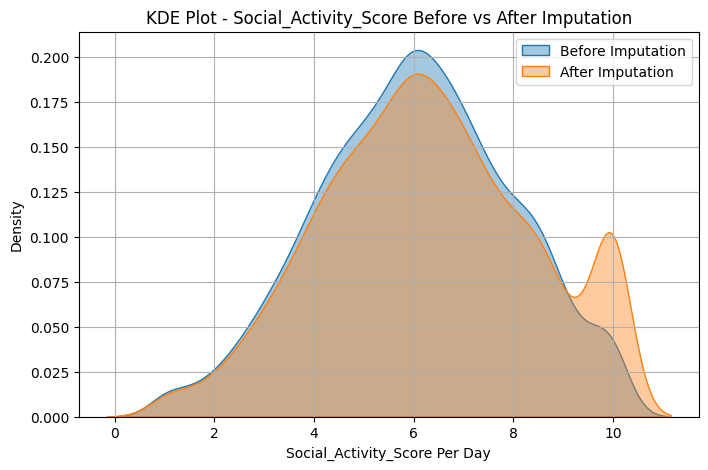

In [24]:
high_end = df['Social_Activity_Score'].quantile(0.99)
df['Social_Activity_Score_HIGHEndDist'] = df['Social_Activity_Score'].fillna(high_end)


# 4. Check results
print("1% quantile (used for imputation):", low_end)
print("Missing values after imputation:", df['Social_Activity_Score_EndDist'].isnull().sum())

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_HIGHEndDist'], label='After Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Imputation')
plt.xlabel('Social_Activity_Score Per Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Median value (used for imputation): 6.0
Missing values after imputation: 0


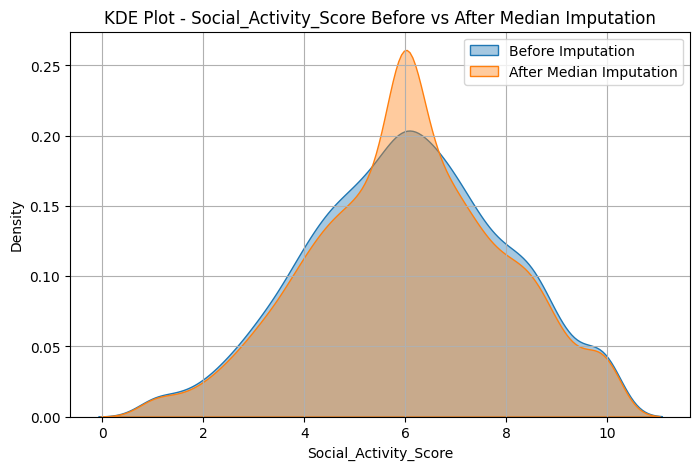

In [25]:
median_value = df['Social_Activity_Score'].median()

# 2. Fill missing values with the median
df['Social_Activity_Score_Median'] = df['Social_Activity_Score'].fillna(median_value)

# 3. Check results
print("Median value (used for imputation):", median_value)
print("Missing values after imputation:", df['Social_Activity_Score_Median'].isnull().sum())

# 4. KDE Plot before vs after median imputation
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_Median'], label='After Median Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Median Imputation')
plt.xlabel('Social_Activity_Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Missing values after random sample imputation: 0


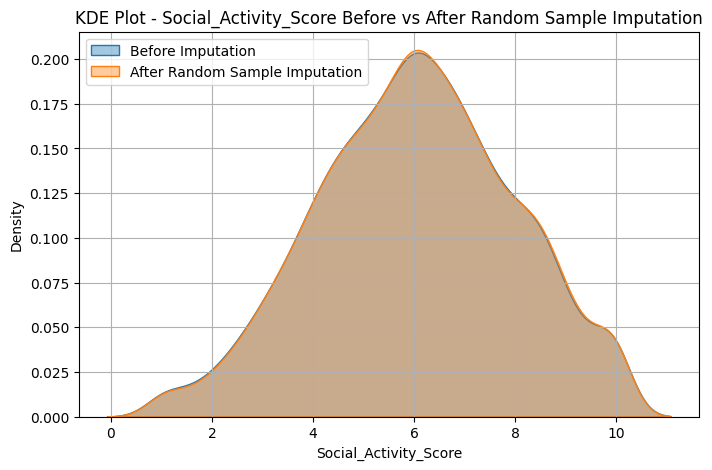

In [26]:
missing_mask = df['Social_Activity_Score'].isnull()

# 2. Randomly sample from existing (non-missing) values
random_samples = df.loc[~missing_mask, 'Social_Activity_Score'].sample(
    n=missing_mask.sum(), replace=True, random_state=42
)

# 3. Copy the original dataframe and fill missing values with random samples
df['Social_Activity_Score_Random'] = df['Social_Activity_Score'].copy()
df.loc[missing_mask, 'Social_Activity_Score_Random'] = random_samples.values

# 4. Check results
print("Missing values after random sample imputation:",
      df['Social_Activity_Score_Random'].isnull().sum())

# 5. KDE Plot before vs after random sample imputation
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Social_Activity_Score'], label='Before Imputation', fill=True, alpha=0.4)
sns.kdeplot(df['Social_Activity_Score_Random'], label='After Random Sample Imputation', fill=True, alpha=0.4)

plt.title('KDE Plot - Social_Activity_Score Before vs After Random Sample Imputation')
plt.xlabel('Social_Activity_Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df['Social_Activity_Score']=df['Social_Activity_Score_Random']
df.drop(columns=['Social_Activity_Score_Random','Social_Activity_Score_Arbitrary','Social_Activity_Score_EndDist','Social_Activity_Score_KNN','Social_Activity_Score_Median','Social_Activity_Score_HIGHEndDist','Stress_Level_encoded'], inplace=True)
df.head()


,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3
3,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


In [ ]:
df["Stress_Level"].unique()

array(['Medium', nan, 'High', 'high', 'Low', 'medium', 'low'],
      dtype=object)

In [28]:
df['Stress_Level'] = df['Stress_Level'].str.title()
df["Stress_Level"].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [29]:
df["Stress_Level"].value_counts()

,count
Stress_Level,
Medium,2928
High,1752
Low,34


In [30]:
imputer = SimpleImputer(strategy='most_frequent')
df[['Stress_Level_Simp']] = imputer.fit_transform(df[['Stress_Level']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
 11  Stress_Level_Simp        5000 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 468.9+ KB


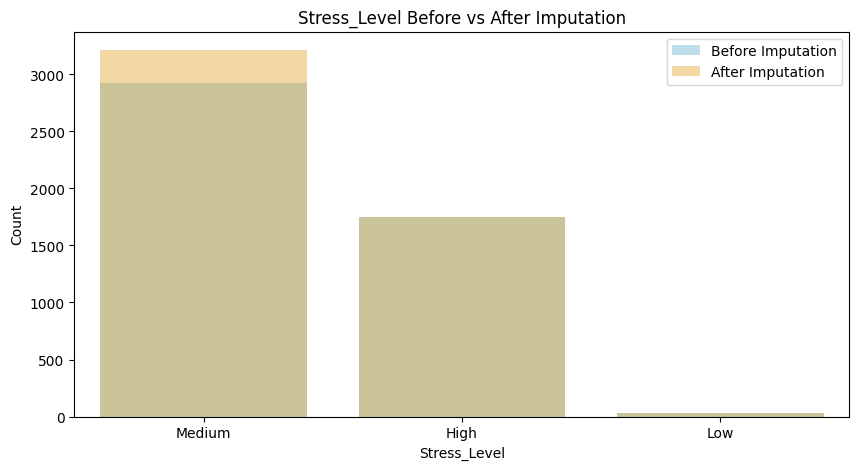

In [31]:
plt.figure(figsize=(10,5))

# Before imputation
sns.countplot(x='Stress_Level', data=df, order=df['Stress_Level'].value_counts().index,
              color='skyblue', alpha=0.6, label='Before Imputation')

# After imputation (overlay)
sns.countplot(x='Stress_Level_Simp', data=df, order=df['Stress_Level_Simp'].value_counts().index,
              color='orange', alpha=0.4, label='After Imputation')

plt.title('Stress_Level Before vs After Imputation')
plt.xlabel('Stress_Level')
plt.ylabel('Count')
plt.legend()
plt.show()

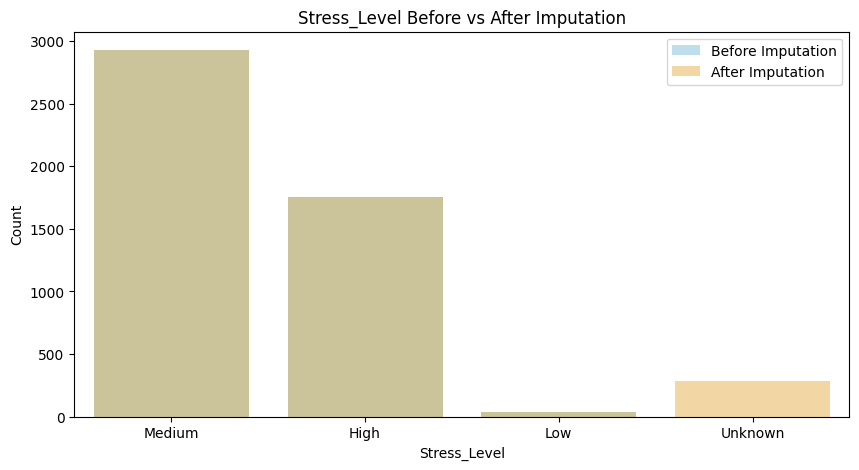

In [32]:
df['Stress_Level_Imputed'] = df['Stress_Level'].fillna('Unknown')

plt.figure(figsize=(10,5))

# Before imputation
sns.countplot(x='Stress_Level', data=df, order=df['Stress_Level'].value_counts().index,
              color='skyblue', alpha=0.6, label='Before Imputation')

# After imputation (overlay)
sns.countplot(x='Stress_Level_Imputed', data=df, order=df['Stress_Level_Imputed'].value_counts().index,
              color='orange', alpha=0.4, label='After Imputation')

plt.title('Stress_Level Before vs After Imputation')
plt.xlabel('Stress_Level')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
df['Stress_Level']=df['Stress_Level_Imputed']
df.drop(columns=['Stress_Level_Imputed','Stress_Level_Simp'], inplace=True)
df.head()

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,24,Female,3.45,8.00,0.11,5.59,5.9,Unknown,68.1,37.4,72.3
3,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


# **Insights**

as the categorical column "stress level" has more missing values then 5% so we are relace it with mode.

In [67]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'f': 'female',
    'female': 'female',
    'femmale': 'female',
    'fmale': 'female',
    'fmmale': 'female',
    'm': 'male',
    'male': 'male',
    'mal': 'male',
    'nb': 'non-binary',
    'non binary': 'non-binary',
    'non-binary': 'non-binary',
    'prefer not to say': 'prefer not to say',
    'prfer not to say': 'prefer not to say',
    'other': 'other',
    'othr': 'other'
})
df["Gender"].unique()

array(['female', 'non-binary', 'male', 'prefer not to say', 'other'],
      dtype=object)

In [68]:
df["Gender"].value_counts()

,count
Gender,
female,1970
non-binary,1164
male,1139
prefer not to say,373
other,354


In [ ]:
from scipy.stats import f_oneway

groups = [df[df['Gender']==g]['Academic_Score'].dropna() for g in df['Gender'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA p-value: {p_val}")


ANOVA p-value: 0.28170970467234946


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, f_regression
le = LabelEncoder()
df['Stress_Level_encoded'] = le.fit_transform(df['Stress_Level'])
f_value, p_value = f_regression(df[['Stress_Level_encoded']], df['Academic_Score'])
print("F-value:", f_value, "P-value:", p_value)

F-value: [34.33127868] P-value: [4.94617554e-09]


# **Insights**

as we can see above Anova p value is < 0.5 all means categroies are imp so we cannot merger nono binary , other and pefer not say as one

# **Removing Outliers**

In [ ]:
df["Study_Hours_Per_Day"].describe()

,Study_Hours_Per_Day
count,5000.000000
mean,3.117468
std,2.414460
min,-4.060000
25%,1.770000
50%,2.980000
75%,4.261988
max,24.000000


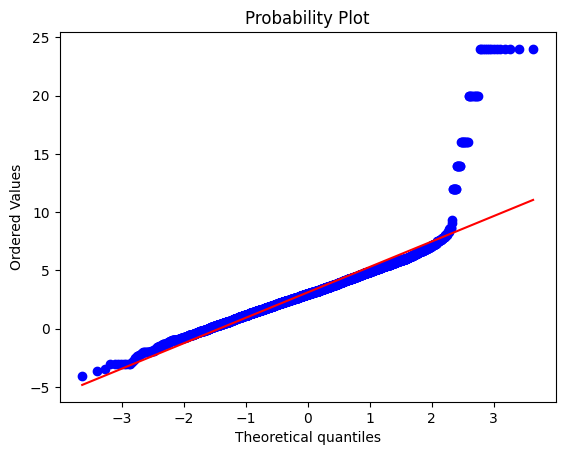

In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Study_Hours_Per_Day'], dist="norm", plot=plt)
plt.show()


In [ ]:
print(df['Study_Hours_Per_Day'].skew())   # close to 0 → roughly symmetric
print(df['Study_Hours_Per_Day'].kurt())   # close to 3 → normal tails



2.88857527392636
21.0427977858103


In [35]:
#fill negative values with zero and extreme with uper wisker

df.loc[df['Study_Hours_Per_Day'] < 0, 'Study_Hours_Per_Day'] = 0

Q1 = df['Study_Hours_Per_Day'].quantile(0.25)
Q3 = df['Study_Hours_Per_Day'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Study_Hours_Per_Day'] > upper_limit, 'Study_Hours_Per_Day'] = upper_limit

df['Study_Hours_Per_Day'].describe()

,Study_Hours_Per_Day
count,5000.000000
mean,3.061518
std,1.810805
min,0.000000
25%,1.770000
50%,2.980000
75%,4.261988
max,7.999969


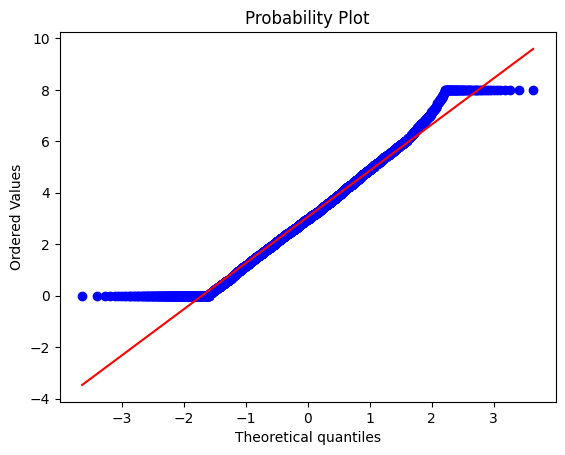

In [ ]:

stats.probplot(df['Study_Hours_Per_Day'], dist="norm", plot=plt)
plt.show()

In [36]:
#stats addition
from scipy import stats
z_scores = np.abs(stats.zscore(df['Study_Hours_Per_Day']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [ ]:
print(df['Sleep_Hours'].skew())   # close to 0 → roughly symmetric
print(df['Sleep_Hours'].kurt())

1.5376337295804423
16.60236785104593


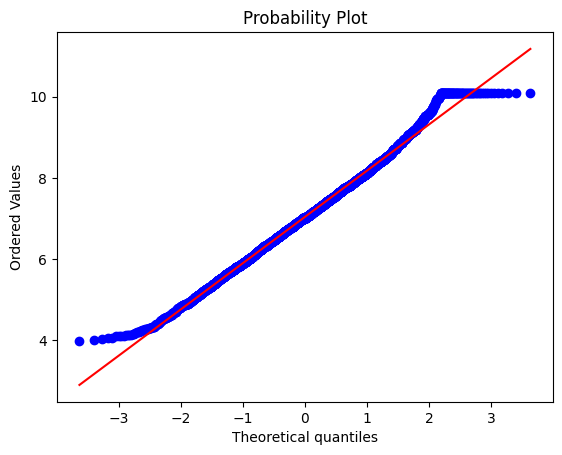

In [37]:

Q1 = df['Sleep_Hours'].quantile(0.25)
Q3 = df['Sleep_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median= df['Sleep_Hours'].median()
df.loc[df['Sleep_Hours'] < lower_limit, 'Sleep_Hours'] = median
df.loc[df['Sleep_Hours'] > upper_limit, 'Sleep_Hours'] = upper_limit
stats.probplot(df['Sleep_Hours'], dist="norm", plot=plt)
plt.show()

In [ ]:
#stats addition
z_scores = np.abs(stats.zscore(df['Sleep_Hours']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [ ]:
print(df['Physical_Activity_Hours'].skew())   # close to 0 → roughly symmetric
print(df['Physical_Activity_Hours'].kurt())

2.314963889685286
11.14881603053555


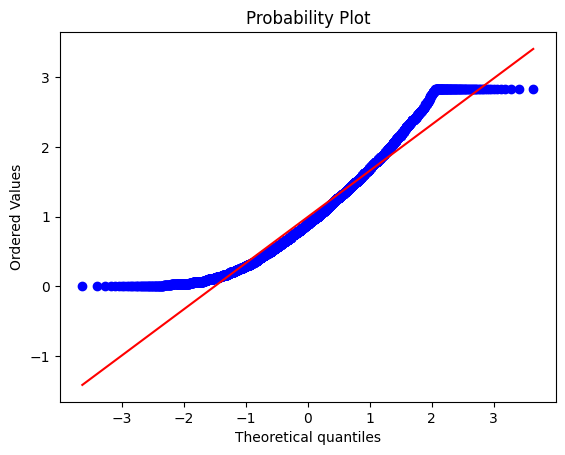

In [38]:

Q1 = df['Physical_Activity_Hours'].quantile(0.25)
Q3 = df['Physical_Activity_Hours'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
med=df['Physical_Activity_Hours'].median()
df.loc[df['Physical_Activity_Hours'] < 0, 'Physical_Activity_Hours'] = 0
df.loc[df['Physical_Activity_Hours'] > upper_limit, 'Physical_Activity_Hours'] =upper_limit
stats.probplot(df['Physical_Activity_Hours'], dist="norm", plot=plt)
plt.show()


In [ ]:
#stats addition

z_scores = np.abs(stats.zscore(df['Physical_Activity_Hours_01']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [ ]:
print(df['Screen_Time_Hours'].skew())   # close to 0 → roughly symmetric
print(df['Screen_Time_Hours'].kurt())

0.858872223640945
3.640807626569398


Number of outliers: 54


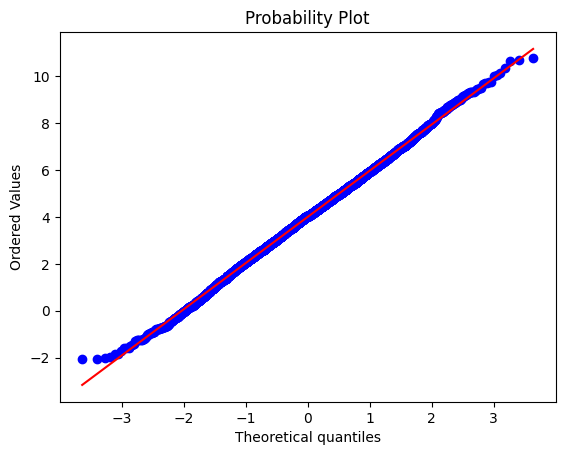

In [39]:


column = 'Screen_Time_Hours'  # replace with your column
threshold = 3  # typical threshold for outliers

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[column]))

# Identify outliers
outliers = df[z_scores > threshold]
print(f"Number of outliers: {len(outliers)}")

# Option 1: Remove outliers
df_no_outliers = df[z_scores <= threshold]

# Option 2: Replace outliers with median (optional)
med = df[column].median()
df.loc[z_scores > threshold, column] = med
stats.probplot(df['Screen_Time_Hours'], dist="norm", plot=plt)
plt.show()

In [ ]:
#stats addition

z_scores = np.abs(stats.zscore(df['Screen_Time_Hours']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 54


In [ ]:
print(df['Social_Activity_Score'].skew())   # close to 0 → roughly symmetric
print(df['Social_Activity_Score'].kurt())

-0.10186083183332258
-0.41071440612632903


Number of outliers: 0


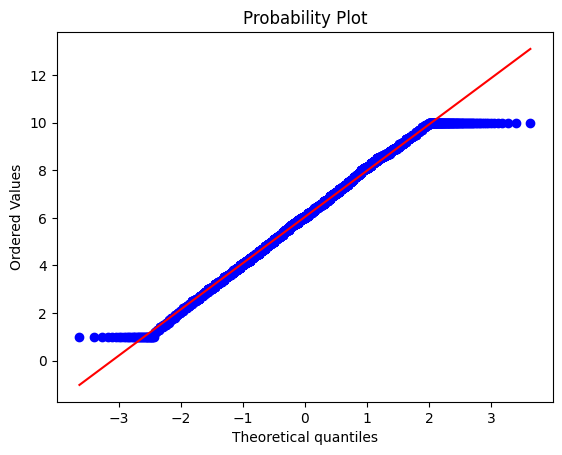

In [40]:

column = 'Social_Activity_Score'
threshold = 3  # typical z-score threshold

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[column]))

# Identify outliers
outliers = df[z_scores > threshold]
print(f"Number of outliers: {len(outliers)}")

# Optionally, replace extreme outliers with median
med = df[column].median()
df.loc[z_scores > threshold, column] = med
stats.probplot(df['Social_Activity_Score'], dist="norm", plot=plt)
plt.show()

In [ ]:
print(df['Attendance_Rate'].skew())   # close to 0 → roughly symmetric
print(df['Attendance_Rate'].kurt())

-0.24729804085230064
-0.2057413691261627


66.2 110.2


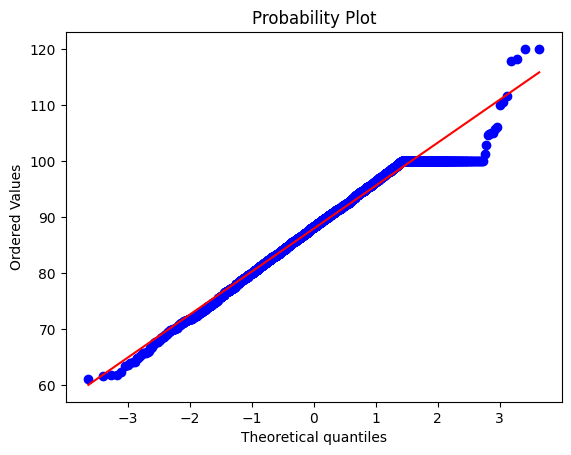

In [41]:
Q1 = df['Attendance_Rate'].quantile(0.25)
Q3 = df['Attendance_Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)
stats.probplot(df['Attendance_Rate'], dist="norm", plot=plt)
plt.show()

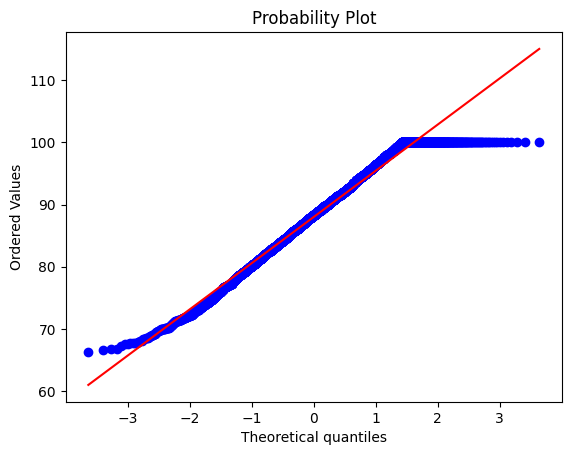

In [44]:

Q1 = df['Attendance_Rate'].quantile(0.25)
Q3 = df['Attendance_Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median=df['Attendance_Rate'].median()
df.loc[df['Attendance_Rate'] < lower_limit, 'Attendance_Rate'] = median
df.loc[df['Attendance_Rate'] > 100, 'Attendance_Rate'] = 100
df['Attendance_Rate'].describe()
stats.probplot(df['Attendance_Rate'], dist="norm", plot=plt)
plt.show()

In [ ]:
#stats addition

z_scores = np.abs(stats.zscore(df['Attendance_Rate']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


# **EDA(Univariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


In [ ]:
df["Age"].unique()

array([18, 24, 16, 27, 23, 22, 21, 25, 17, 20, 19, 26, 30])

<Axes: xlabel='Age', ylabel='count'>

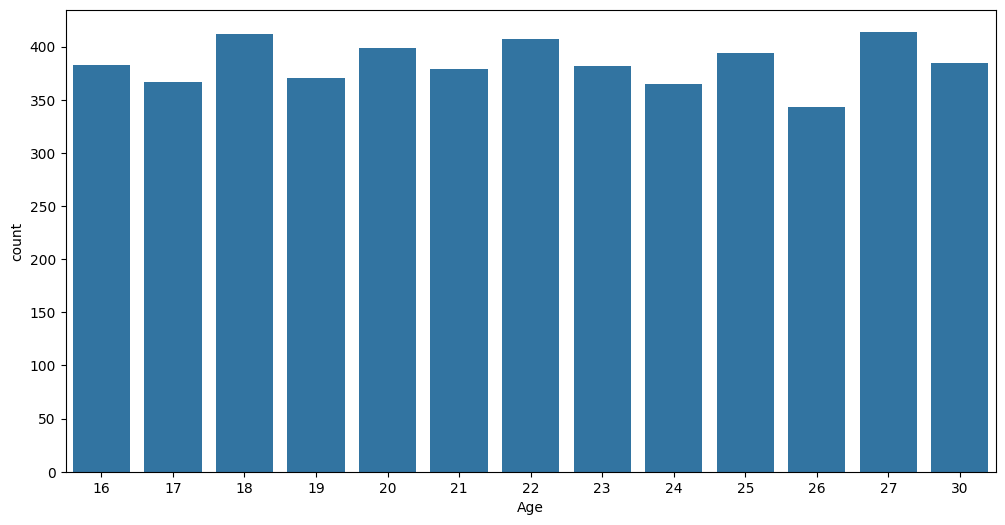

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df)

<Axes: xlabel='Stress_Level', ylabel='count'>

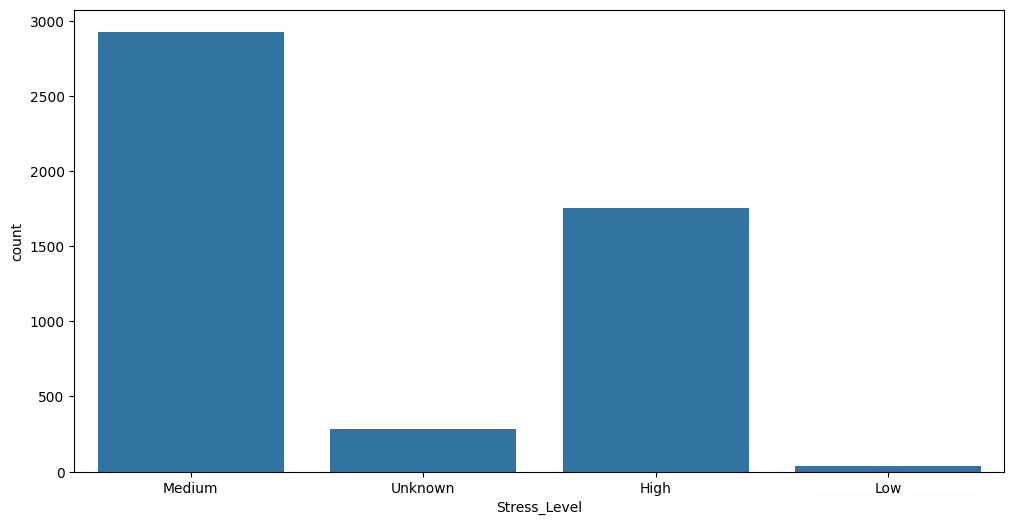

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', data=df)

<Axes: xlabel='Gender', ylabel='count'>

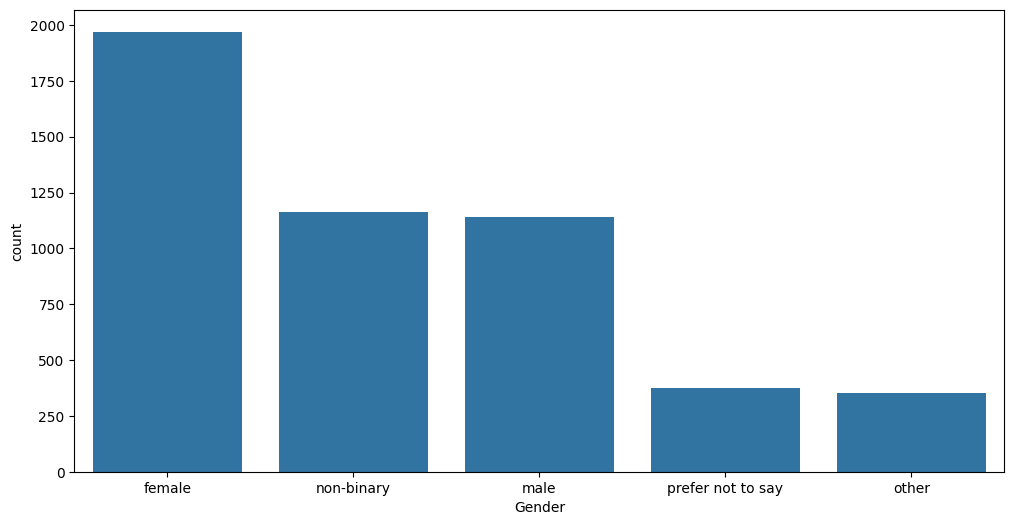

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Study_Hours_Per_Day', ylabel='Count'>

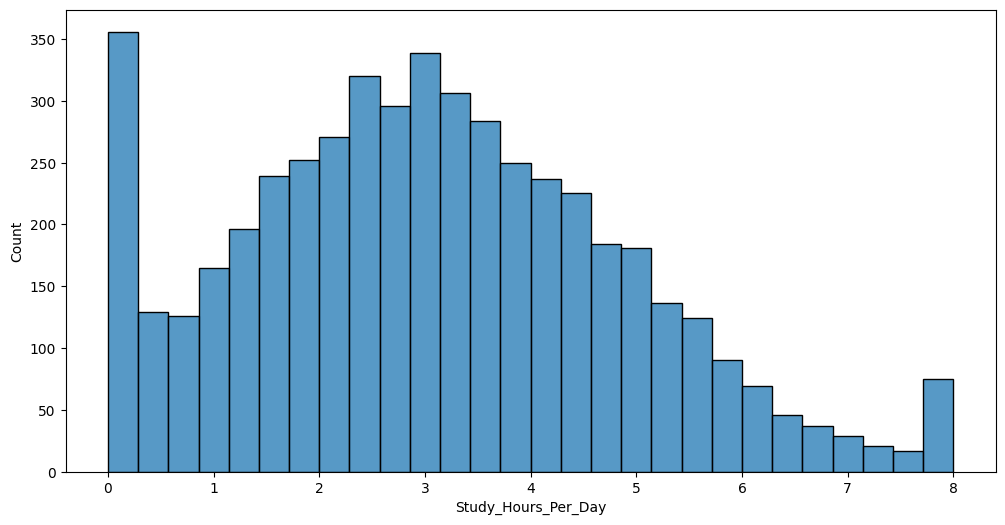

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Study_Hours_Per_Day', data=df)

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

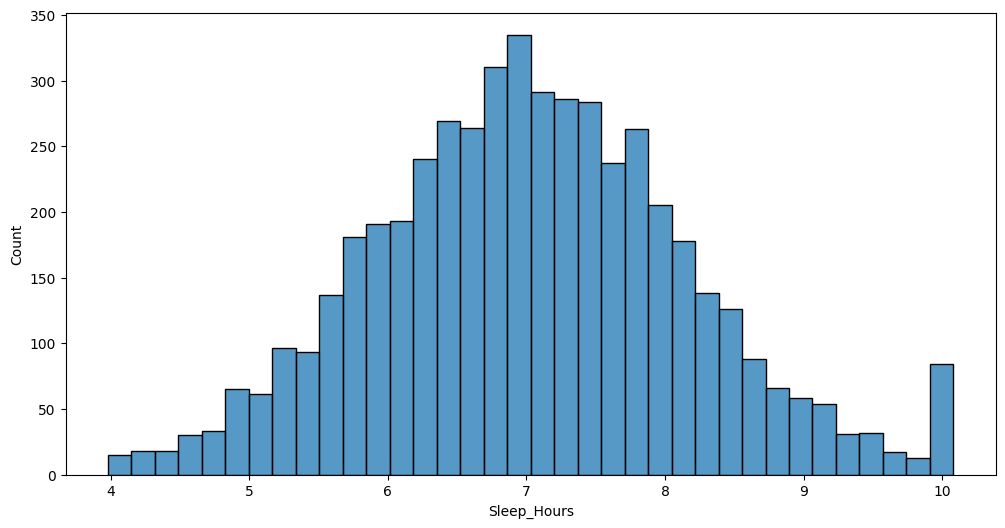

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Sleep_Hours', data=df)

<Axes: xlabel='Physical_Activity_Hours', ylabel='Count'>

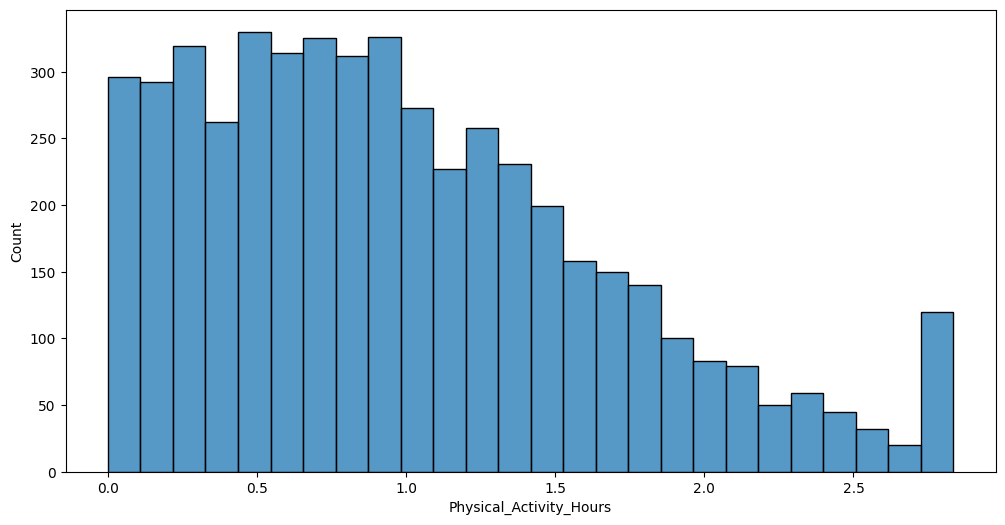

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Physical_Activity_Hours', data=df)

In [50]:
# stats addition
from scipy.stats import shapiro, skew

for col in ['Age', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours']:
    stat, p = shapiro(df[col])
    print(f"{col} -> p-value = {p:.4f}")

Age -> p-value = 0.0000
Study_Hours_Per_Day -> p-value = 0.0000
Sleep_Hours -> p-value = 0.0000
Physical_Activity_Hours -> p-value = 0.0000


In [ ]:
for col in ['Age','Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours']:
  print("Skewness:", skew(df[col]))

Skewness: 0.247252748578068
Skewness: 0.3281183545330751
Skewness: 0.03849972482098434
Skewness: 0.7042172480628089


# **Insights**
we can see that only 'Physical_Activity_Hours' have skewness > 0.5 whereas 'Age', Study_Hours_Per_Day 'and 'Sleep_Hours' have skweness between -0.5 to +0.5 which mean we can apply test like t test/z test/ANOVA on it even through their p values are less than 0.005

<Axes: xlabel='Screen_Time_Hours', ylabel='Count'>

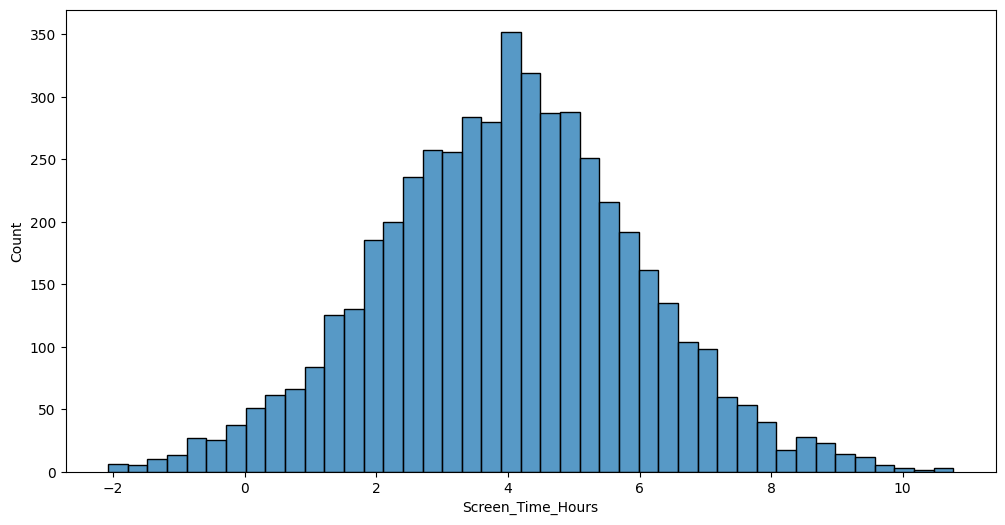

In [51]:

plt.figure(figsize=(12, 6))
sns.histplot(x='Screen_Time_Hours', data=df)


<Axes: xlabel='Social_Activity_Score', ylabel='Count'>

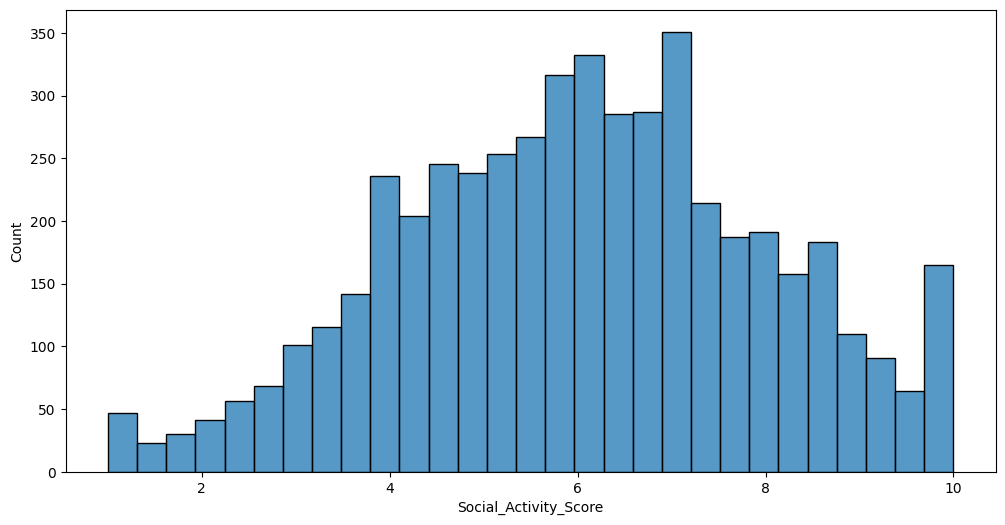

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Social_Activity_Score', data=df)

<Axes: xlabel='Attendance_Rate', ylabel='Count'>

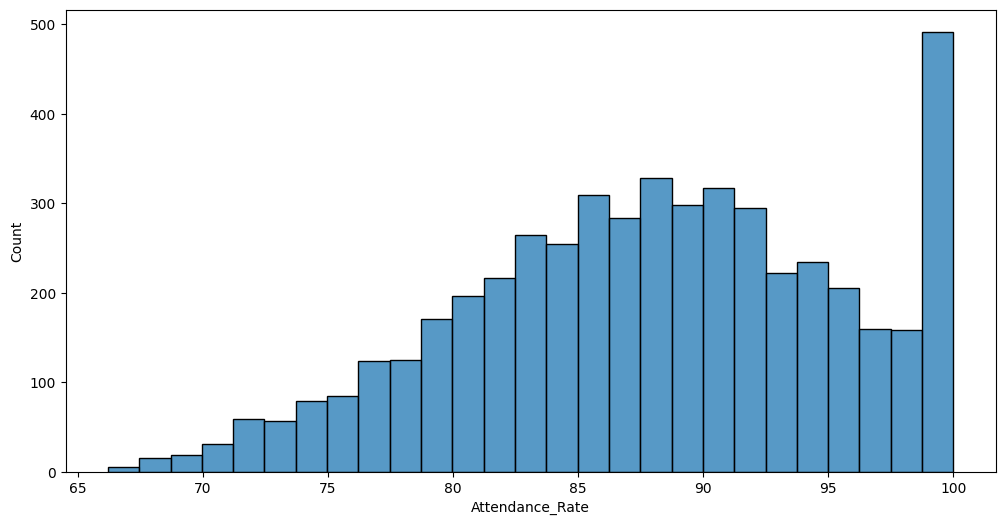

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Attendance_Rate', data=df)

In [55]:
# stats addition

for col in ['Screen_Time_Hours', 'Attendance_Rate', 'Social_Activity_Score']:
    stat, p = shapiro(df[col])
    print(f"{col} -> p-value = {p:.4f}")

Screen_Time_Hours -> p-value = 0.0209
Attendance_Rate -> p-value = 0.0000
Social_Activity_Score -> p-value = 0.0000


In [56]:
for col in ['Screen_Time_Hours',  'Attendance_Rate', 'Social_Activity_Score']:
  print("Skewness:", skew(df[col]))

Skewness: 0.005559851339019539
Skewness: -0.24935837426934335
Skewness: -0.10183027103689522


# **Insights**
we can see that all 'Screen_Time_Hours', 'Mental_Wellbeing_Score', 'Attendance_Rate', 'Social_Activity_Score' have skweness between -0.5 to +0.5 which mean we can apply test like t test/z test/ANOVA on it even through their p values are less than 0.005

# **Insights**

from histrogram and countplots it is shown there is no outliers and same categories with diferent name right now.

# **EDA(Bivariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


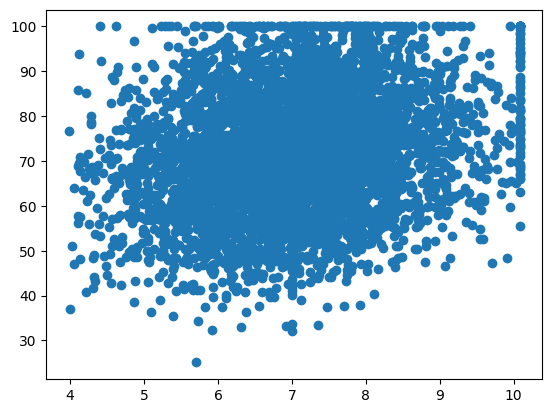

In [57]:
plt.scatter(df['Sleep_Hours'], df['Academic_Score'])

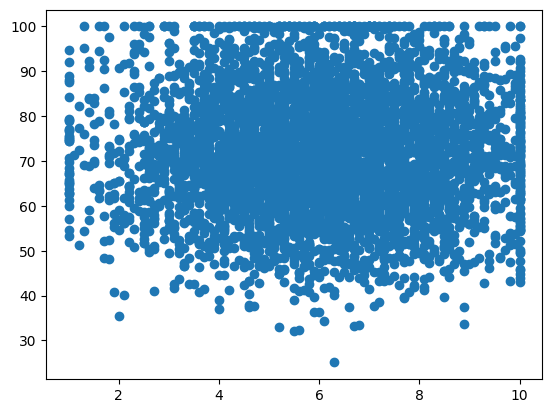

In [58]:
plt.scatter(df['Social_Activity_Score'], df['Academic_Score'])

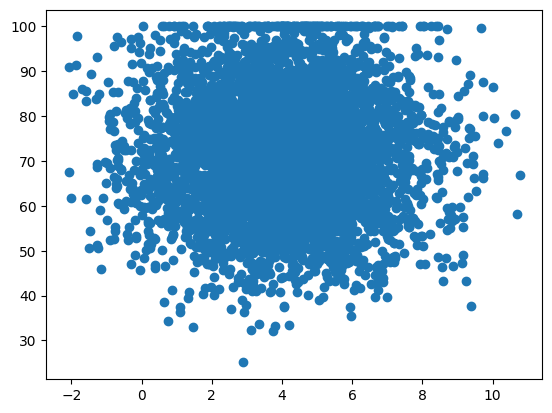

In [59]:
plt.scatter(df['Screen_Time_Hours'], df['Academic_Score'])

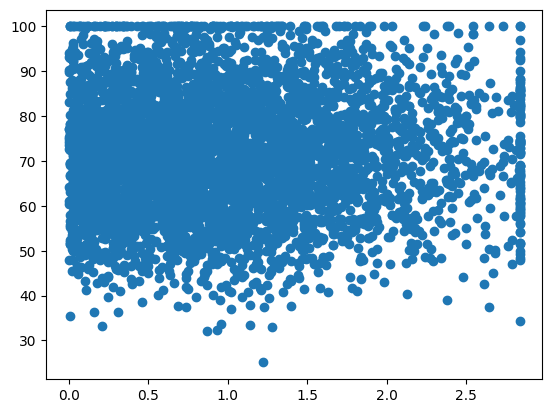

In [60]:
plt.scatter(df['Physical_Activity_Hours'], df['Academic_Score'])

Text(0.5, 1.0, 'Score Distribution by Stress Level')

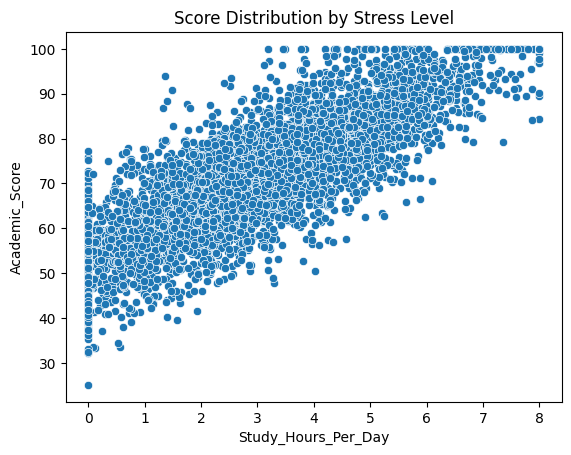

In [61]:
sns.scatterplot(x='Study_Hours_Per_Day', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

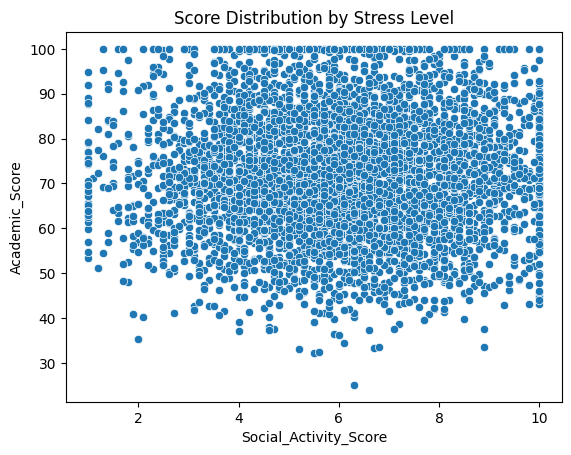

In [62]:
sns.scatterplot(x='Social_Activity_Score', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

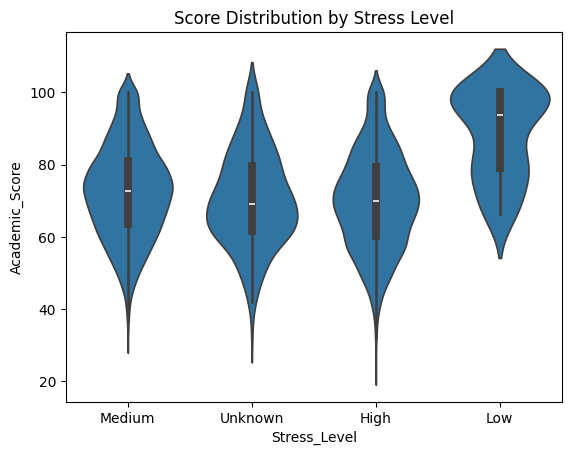

In [63]:
sns.violinplot(x='Stress_Level', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

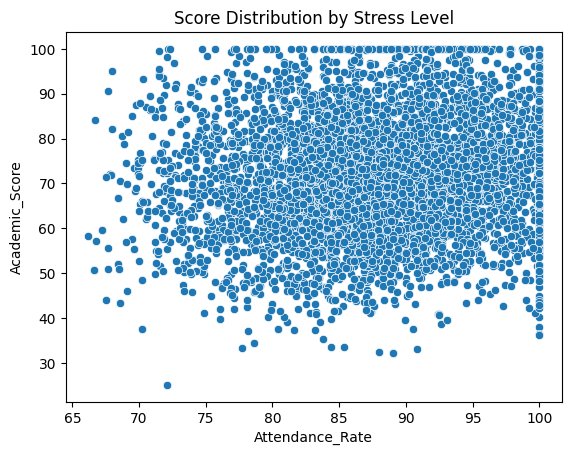

In [64]:
sns.scatterplot(x='Attendance_Rate', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

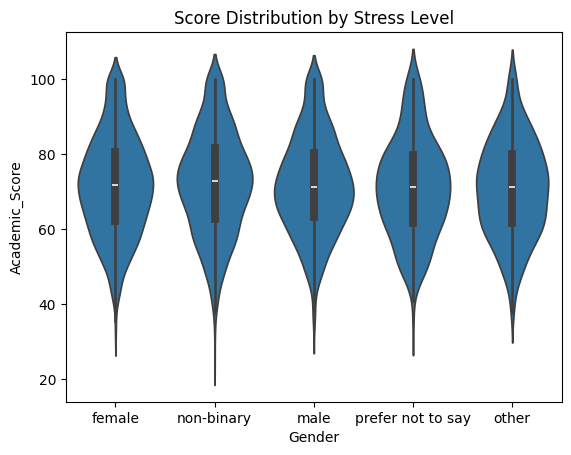

In [69]:
sns.violinplot(x='Gender', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

# **Insights**
1. students age is between 16 to 30. all ages almost have equal number of students.
2. The scatter plots are not showing any specific trends means either ostive or negative means the is no strong between  Study_Hours_Per_Day, Sleep_Hours,  Physical_Activity_Hours, Screen_Time_Hours, Social_Activity_Score,
Mental_Wellbeing_Score,Attendance_Rate and academic score.
3. Students with low stress level which is rare have high academic score. Medium and High Stress Level have almost same academic score.
4. All genders have almost equal academicc score.

Text(0.5, 1.0, 'Study Hours vs Sleep Hours')

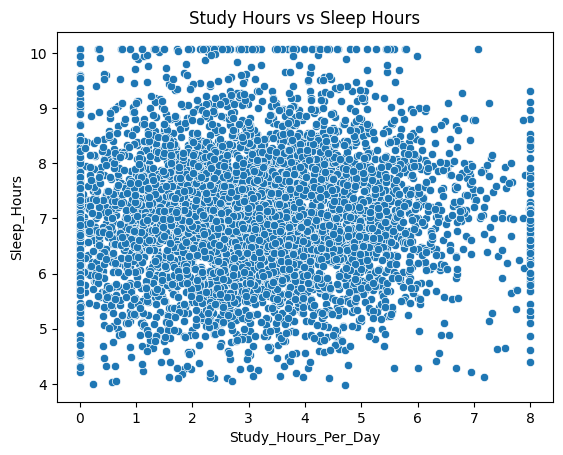

In [70]:
# 1. Study vs Sleep
sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='Sleep_Hours')
plt.title('Study Hours vs Sleep Hours')



Text(0.5, 1.0, 'Screen Time vs Sleep Hours')

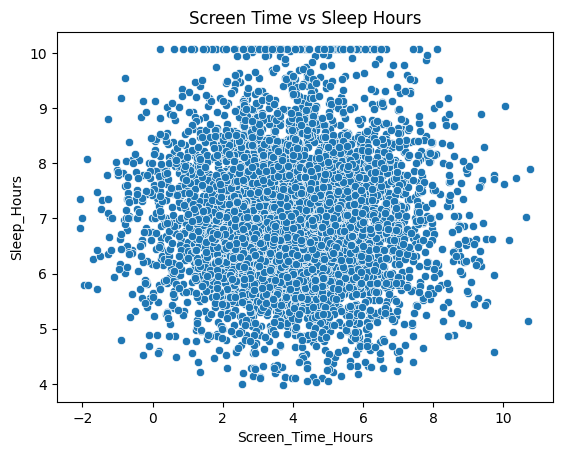

In [71]:
sns.scatterplot(data=df, x='Screen_Time_Hours', y='Sleep_Hours')
plt.title('Screen Time vs Sleep Hours')



Text(0.5, 1.0, 'Attendance Rate vs Study Hours')

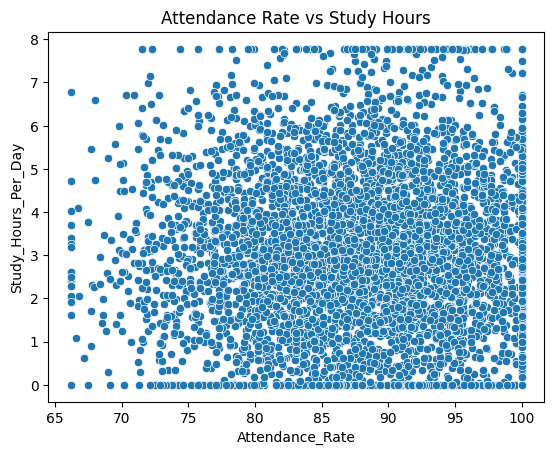

In [ ]:
# 4. Attendance vs Study Hours
sns.scatterplot(data=df, x='Attendance_Rate', y='Study_Hours_Per_Day')
plt.title('Attendance Rate vs Study Hours')


# **Insights**

1. above we make plots between two features column so that we can obersve f there is any clear pattern between them means if one feature is effecting other or or both together effecting the target column.
2. In stress vs metal wellbeing_score we can see student with less have high well being score and there in no clear pattern in other plots.

# **EDA(Multivariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

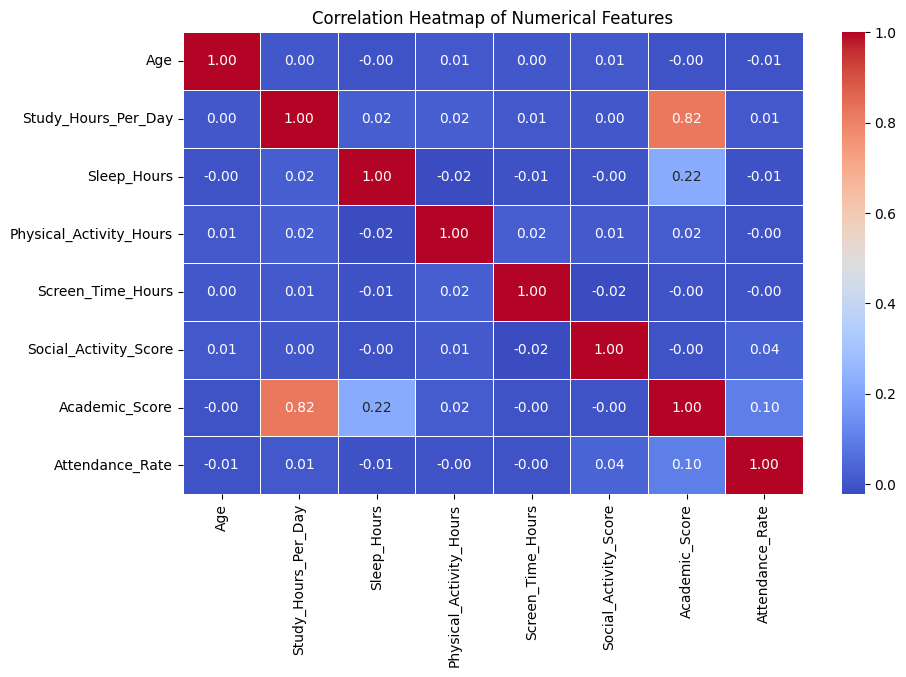

In [73]:
numeric_cols = ['Age', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours',
                'Screen_Time_Hours', 'Social_Activity_Score',
                'Academic_Score',  'Attendance_Rate']

corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')


# **Insights**
1. From above heatmap it is shown that Study_per_hour and academic_score have strongest positive correlation which is (0.78) and screen_time_hours and mental_wellbeing have strongest negative correlation which is (-2.0) here.


Text(0.5, 0.92, '3D Relation: Study Hours, Sleep Hours, and Academic Score')

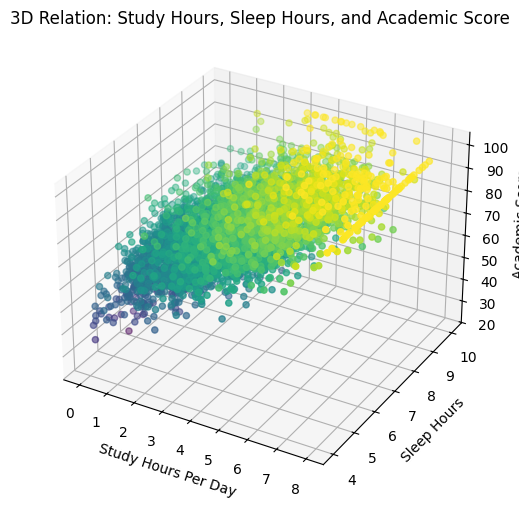

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Study_Hours_Per_Day'], df['Sleep_Hours'], df['Academic_Score'],
           c=df['Academic_Score'], cmap='viridis')

ax.set_xlabel('Study Hours Per Day')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Academic Score')
ax.set_title('3D Relation: Study Hours, Sleep Hours, and Academic Score')


# Inferentials

In [ ]:
from scipy.stats import f_oneway

# Split academic scores by gender category
female = df[df['Gender'] == 'female']['Academic_Score']
male = df[df['Gender'] == 'male']['Academic_Score']
non_binary = df[df['Gender'] == 'non-binary']['Academic_Score']
other = df[df['Gender'] == 'other']['Academic_Score']
prefer_not = df[df['Gender'] == 'prefer not to say']['Academic_Score']

# Apply One-Way ANOVA
f_stat, p_val = f_oneway(female, male, non_binary, other, prefer_not)

print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")


ANOVA F-statistic = 1.264, p-value = 0.2817


**Insights**

as it is shown from anova test p-value = 0.2817 which is < 0.5 which all genders don't score same atleast each gender score is different and F-statistic = 1.264 which genger are not significantly same.

In [76]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Physical_Activity_Hours'], df['Academic_Score'])

print(f"Spearman Correlation = {corr:.3f}, p-value = {p_value:.4f}")


Spearman Correlation = 0.017, p-value = 0.2225


**Insights**

* as physical activity hours column donot follow any normal distrubution that why i have use Spearman Correlation instead of Pearson's Correlation.
* Spearman’s correlation test between physical activity and academic performance (ρ = 0.017, p = 0.218) shows no significant association, suggesting that physical activity hours have little to no impact on students’ academic scores.

In [75]:
from scipy.stats import pearsonr

cols = ['Age','Study_Hours_Per_Day', 'Sleep_Hours', 'Screen_Time_Hours',
        'Social_Activity_Score',  'Attendance_Rate']

for col in cols:
        corr, p_val = pearsonr(df[col], df['Academic_Score'])
        print(f"{col} ↔ Academic_Score →    Corr = {corr:.3f},   p-value = {p_val:.4f}")

Age ↔ Academic_Score →    Corr = -0.003,   p-value = 0.8203
Study_Hours_Per_Day ↔ Academic_Score →    Corr = 0.823,   p-value = 0.0000
Sleep_Hours ↔ Academic_Score →    Corr = 0.220,   p-value = 0.0000
Screen_Time_Hours ↔ Academic_Score →    Corr = -0.004,   p-value = 0.7883
Social_Activity_Score ↔ Academic_Score →    Corr = -0.003,   p-value = 0.8415
Attendance_Rate ↔ Academic_Score →    Corr = 0.098,   p-value = 0.0000


**Insights**
* All the selected columns are numeric and normally distributed, so applying the Pearson correlation test is appropriate to measure the linear relationships between each variable and Academic_Score.
* Study_Hours_Per_Day shows the strongest and most significant relationship with Academic_Score, indicating it’s the most influential factor.
* Sleep_Hours, Mental_Wellbeing_Score, and Attendance_Rate have weak but statistically significant positive effects.
* 'Age','Screen_Time_Hours and Social_Activity_Score show no significant relationship, implying they do not impact academic performance in this dataset.

In [77]:
# ANOVA Test for stress level
from scipy.stats import f_oneway

med = df[df['Stress_Level'] == 'Medium']['Academic_Score']
high = df[df['Stress_Level'] == 'High']['Academic_Score']
low = df[df['Stress_Level'] == 'Low']['Academic_Score']

f_stat, p_val = f_oneway(med,high,low)

print(f"F statistics = {f_stat:.3f}, p value = {p_val:.4f}")

F statistics = 47.340, p value = 0.0000


**Insights**
* students academic performance varies significantly depending on their stress level.
* at least one stress group has a different average academic score compared to the others.

# **Feature Engineering**

# **Encode Categorical Features**

In [81]:
grouped_mean = df.groupby('Gender')['Academic_Score'].mean().reset_index()

# Sort by mean score (optional — helps to see order clearly)
grouped_mean = grouped_mean.sort_values(by='Academic_Score', ascending=False)

print(grouped_mean)

              Gender  Academic_Score
2         non-binary       72.277835
1               male       71.833538
0             female       71.553046
4  prefer not to say       71.130563
3              other       70.745763


In [82]:
df=pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)
df.head()

,Age,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_Encoded,Gender_male,Gender_non-binary,Gender_other,Gender_prefer not to say
0,18,5.60,7.42,0.09,4.79,6.7,98.0,63.3,89.2,2,False,False,False,False
1,24,2.93,7.57,0.35,4.61,8.6,67.2,39.0,89.8,2,False,False,False,False
2,24,3.45,8.00,0.11,5.59,5.9,68.1,37.4,72.3,1,False,False,False,False
3,16,2.78,6.37,1.71,2.53,5.4,66.7,39.1,84.7,2,False,True,False,False
4,27,0.00,4.87,0.46,0.65,7.2,38.6,41.6,92.6,2,False,False,False,False


In [ ]:
df["Stress_Level"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [78]:
grouped_mean = df.groupby('Stress_Level')['Academic_Score'].mean().reset_index()

# Sort by mean score (optional — helps to see order clearly)
grouped_mean = grouped_mean.sort_values(by='Academic_Score', ascending=False)

print(grouped_mean)

  Stress_Level  Academic_Score
1          Low       88.205882
2       Medium       72.610417
3      Unknown       70.514685
0         High       70.043094


In [79]:

stress_mapping = {
    'High': 0,
    'Unknown': 1,
    'Medium': 2,
    'Low': 3
}

# Apply mapping to create encoded column
df['Stress_Level_Encoded'] = df['Stress_Level'].map(stress_mapping)

# Verify encoding
print(df[['Stress_Level', 'Stress_Level_Encoded']].head())


  Stress_Level  Stress_Level_Encoded
0       Medium                     2
1       Medium                     2
2      Unknown                     1
3       Medium                     2
4       Medium                     2


In [80]:
df.drop(columns=['Stress_Level'], inplace=True)
df.head()

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_Encoded
0,18,female,5.60,7.42,0.09,4.79,6.7,98.0,63.3,89.2,2
1,24,female,2.93,7.57,0.35,4.61,8.6,67.2,39.0,89.8,2
2,24,female,3.45,8.00,0.11,5.59,5.9,68.1,37.4,72.3,1
3,16,non-binary,2.78,6.37,1.71,2.53,5.4,66.7,39.1,84.7,2
4,27,female,0.00,4.87,0.46,0.65,7.2,38.6,41.6,92.6,2


# **Feature selection**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Study_Hours_Per_Day       5000 non-null   float64
 2   Sleep_Hours               5000 non-null   float64
 3   Physical_Activity_Hours   5000 non-null   float64
 4   Screen_Time_Hours         5000 non-null   float64
 5   Social_Activity_Score     5000 non-null   float64
 6   Academic_Score            5000 non-null   float64
 7   Mental_Wellbeing_Score    5000 non-null   float64
 8   Attendance_Rate           5000 non-null   float64
 9   Stress_Level_Encoded      5000 non-null   int64  
 10  Gender_male               5000 non-null   bool   
 11  Gender_non-binary         5000 non-null   bool   
 12  Gender_other              5000 non-null   bool   
 13  Gender_prefer not to say  5000 non-null   bool   
dtypes: bool(

# **Scaling Numerical columns**

In [89]:
df['Age'].unique()

array([18, 24, 16, 27, 23, 22, 21, 25, 17, 20, 19, 26, 30])

In [90]:

import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Columns to transform (skewed ones)
skewed_cols = ['Study_Hours_Per_Day', 'Sleep_Hours',
               'Physical_Activity_Hours', 'Social_Activity_Score', 'Attendance_Rate']

# Apply Yeo-Johnson (works even with zeros and negatives)
pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

# Standardize all numeric columns including screen time
num_cols = skewed_cols + ['Screen_Time_Hours']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[['Age']] = scaler.fit_transform(df[['Age']])

# Check result
df.head()


,Age,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Stress_Level_Encoded,Gender_male,Gender_non-binary,Gender_other,Gender_prefer not to say
0,-1.033441,1.350390,0.360011,-1.660741,0.400001,0.322654,98.0,63.3,0.102447,2,False,False,False,False
1,0.460835,-0.007680,0.488469,-0.998010,0.308665,1.331461,67.2,39.0,0.184978,2,False,False,False,False
2,0.460835,0.272075,0.851950,-1.603924,0.805943,-0.091800,68.1,37.4,-1.925195,1,False,False,False,False
3,-1.531533,-0.089993,-0.565309,1.078314,-0.746783,-0.347093,66.7,39.1,-0.491951,2,False,True,False,False
4,1.207973,-1.889117,-1.982687,-0.758442,-1.700745,0.585100,38.6,41.6,0.580331,2,False,False,False,False


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   float64
 1   Study_Hours_Per_Day       5000 non-null   float64
 2   Sleep_Hours               5000 non-null   float64
 3   Physical_Activity_Hours   5000 non-null   float64
 4   Screen_Time_Hours         5000 non-null   float64
 5   Social_Activity_Score     5000 non-null   float64
 6   Academic_Score            5000 non-null   float64
 7   Mental_Wellbeing_Score    5000 non-null   float64
 8   Attendance_Rate           5000 non-null   float64
 9   Stress_Level_Encoded      5000 non-null   int64  
 10  Gender_male               5000 non-null   bool   
 11  Gender_non-binary         5000 non-null   bool   
 12  Gender_other              5000 non-null   bool   
 13  Gender_prefer not to say  5000 non-null   bool   
dtypes: bool(

#Training the linear regression model

In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Age', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours',
        'Screen_Time_Hours', 'Social_Activity_Score',
        'Attendance_Rate', 'Stress_Level_Encoded' , 'Gender_male', 'Gender_non-binary',
        'Gender_other', 'Gender_prefer not to say']]

y = df['Academic_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



📊 Model Performance:
MAE:  5.412
MSE:  47.088
RMSE: 6.862
R² Score: 0.731
